In [1201]:
# glob get files in large_proposal_votes_2023_07_21
import glob
all_files = glob.glob("large_proposal_votes_2023_07_21/*/*.json")
print(all_files)
print(len(all_files))

['large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1696993406.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1697449967.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1697595447.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1697399010.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1696874734.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1697013644.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1696859597.json', 'large_proposal_votes_2023_07_21/0x4b020109855f25ea982f9330329df970e352cf01f28b30710aec325fd727ee48/votes_1696667070.json', 'large_

In [1203]:
# break all strings on / to make 2d list
all_files = [x.split("/") for x in all_files]
import pandas as pd
df = pd.DataFrame(all_files, columns = ["folder", "proposal_id", "chunk_id"])
df.head()

,folder,proposal_id,chunk_id
0,large_proposal_votes_2023_07_21,0x4b020109855f25ea982f9330329df970e352cf01f28b...,votes_1696993406.json
1,large_proposal_votes_2023_07_21,0x4b020109855f25ea982f9330329df970e352cf01f28b...,votes_1697449967.json
2,large_proposal_votes_2023_07_21,0x4b020109855f25ea982f9330329df970e352cf01f28b...,votes_1697595447.json
3,large_proposal_votes_2023_07_21,0x4b020109855f25ea982f9330329df970e352cf01f28b...,votes_1697399010.json
4,large_proposal_votes_2023_07_21,0x4b020109855f25ea982f9330329df970e352cf01f28b...,votes_1696874734.json


In [1204]:
# group by proposal_id and count chunk_id
files_per_proposal = df.groupby("proposal_id").chunk_id.count()
files_per_proposal = files_per_proposal.to_frame()
# reset index to make proposal_id a column
files_per_proposal = files_per_proposal.reset_index()
# rename chunk_id to file_count
files_per_proposal = files_per_proposal.rename(columns={"chunk_id": "file_count"})
files_per_proposal.head()

,proposal_id,file_count
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371


In [1205]:
# for each chunk, check if finished.txt is in the folder, if it is read its value into a new column called remainder
import os
import json
def get_remainder(row):
    if os.path.isfile('large_proposal_votes_2023_07_21/' + row.proposal_id + "/finished.txt"):
        # get the number of votes in the last file
        file_names = glob.glob(f'large_proposal_votes_2023_07_21/{row.proposal_id}/votes_*.json')
        last_file = max([int(x.split('_')[-1].split('.')[0]) for x in file_names])
        with open(f'large_proposal_votes_2023_07_21/{row.proposal_id}/votes_{last_file}.json', 'r') as f:
            votes = json.load(f)
        return len(votes)
    else:
        return None

files_per_proposal["remainder"] = files_per_proposal.apply(get_remainder, axis=1)
# show where remainder is not None
files_per_proposal[files_per_proposal.remainder.notnull()]

,proposal_id,file_count,remainder
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226,790.0
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211,501.0
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195,165.0
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173,230.0
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371,665.0
5,0x1230e17053ac2e8d023825f19c69fb549c791119ff3a...,173,608.0
6,0x13e489cc2b60e4b57876266b70e15d77d6ac86a23817...,437,916.0
7,0x1a1199e257551beac23b21fdba98f6efba2773a52135...,400,336.0
9,0x2eff53c9e9f0bf19a98345d1d32103ec0ec859d81978...,475,281.0
10,0x34d0595c5e79d37c4a2a99cf604bc511cbb2cf824d44...,178,338.0


In [1206]:
# sort by file_count
files_per_proposal.sort_values("file_count", ascending=False)

,proposal_id,file_count,remainder
47,0xc18c4911e19adf4bd54c6ad142bb08bc81fd44dee723...,517,67.0
54,0xcfc335d45421a2d3b5f64d5ee19770ab103f539cedc2...,513,422.0
57,0xd6bb6427e285ae4e269ebb9f4d0396808d2de356c654...,513,71.0
9,0x2eff53c9e9f0bf19a98345d1d32103ec0ec859d81978...,475,281.0
65,0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34...,473,241.0
...,...,...,...
38,0xa04d8b5f7a2795b7472cce491f4190f4fb2b48c441c1...,58,NaN
27,0x71a84be6c97830a62f1f159807456a2470dc4d0e2b24...,57,NaN
56,0xd4d2e8e079eb0f2255914b89b4c4c460ccdaa35765c0...,54,NaN
46,0xbe09edc955b93b0534675b42dbf1669fdaf1200853ad...,47,NaN


In [1207]:
import pickle
large_proposals_and_votes = pickle.load(open('large_proposals_and_votes.pkl', 'rb'))
large_proposals_and_votes[:2]

[('0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96c3ab22abaa1c7244648e',
  2765849),
 ('0xc18c4911e19adf4bd54c6ad142bb08bc81fd44dee723e520c511c2a9414d5920',
  514470)]

In [1208]:
# make large_proposals_and_votes a dataframe
large_proposals_and_votes = pd.DataFrame(large_proposals_and_votes, columns=["proposal_id", "vote"])
large_proposals_and_votes.head()

,proposal_id,vote
0,0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96...,2765849
1,0xc18c4911e19adf4bd54c6ad142bb08bc81fd44dee723...,514470
2,0xcfc335d45421a2d3b5f64d5ee19770ab103f539cedc2...,510861
3,0xd6bb6427e285ae4e269ebb9f4d0396808d2de356c654...,510523
4,0x2eff53c9e9f0bf19a98345d1d32103ec0ec859d81978...,472911


In [1209]:
large_proposals_and_votes.shape

(916, 2)

In [1210]:
files_per_proposal.shape

(68, 3)

In [1211]:
files_per_proposal = files_per_proposal.merge(large_proposals_and_votes, on="proposal_id", how="inner", validate="one_to_one")
files_per_proposal.shape

(68, 4)

In [1212]:
files_per_proposal.head()

,proposal_id,file_count,remainder,vote
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226,790.0,225194
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211,501.0,210175
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195,165.0,194816
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173,230.0,172034
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371,665.0,369729


In [1213]:
# sort by file_count desc
files_per_proposal.sort_values("file_count", ascending=False)

,proposal_id,file_count,remainder,vote
47,0xc18c4911e19adf4bd54c6ad142bb08bc81fd44dee723...,517,67.0,514470
54,0xcfc335d45421a2d3b5f64d5ee19770ab103f539cedc2...,513,422.0,510861
57,0xd6bb6427e285ae4e269ebb9f4d0396808d2de356c654...,513,71.0,510523
9,0x2eff53c9e9f0bf19a98345d1d32103ec0ec859d81978...,475,281.0,472911
65,0xed5fe9d40c9e82a53c548d4458fdca91d6d26c12cc34...,473,241.0,470709
...,...,...,...,...
38,0xa04d8b5f7a2795b7472cce491f4190f4fb2b48c441c1...,58,NaN,169379
27,0x71a84be6c97830a62f1f159807456a2470dc4d0e2b24...,57,NaN,169903
56,0xd4d2e8e079eb0f2255914b89b4c4c460ccdaa35765c0...,54,NaN,170477
46,0xbe09edc955b93b0534675b42dbf1669fdaf1200853ad...,47,NaN,168495


In [1214]:
# make a column called downloaded_votes that is the file_count * 1000 + remainder if remainder is not None
def get_downloaded_votes(row):
    if pd.isnull(row.remainder):
        return row.file_count * 1000
    else:
        return row.file_count * 1000 + row.remainder

files_per_proposal["downloaded_votes"] = files_per_proposal.apply(get_downloaded_votes, axis=1)
files_per_proposal.head()

,proposal_id,file_count,remainder,vote,downloaded_votes
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226,790.0,225194,226790.0
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211,501.0,210175,211501.0
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195,165.0,194816,195165.0
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173,230.0,172034,173230.0
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371,665.0,369729,371665.0


In [1215]:
# rename vote to total_votes
files_per_proposal = files_per_proposal.rename(columns={"vote": "total_votes"})
# make col called percent_downloaded
files_per_proposal["percent_downloaded"] = files_per_proposal.downloaded_votes / files_per_proposal.total_votes
files_per_proposal.head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226,790.0,225194,226790.0,1.007087
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211,501.0,210175,211501.0,1.006309
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195,165.0,194816,195165.0,1.001791
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173,230.0,172034,173230.0,1.006952
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371,665.0,369729,371665.0,1.005236


In [1216]:
# show rows with a non null remainder
files_per_proposal[files_per_proposal.remainder.notnull()].head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
0,0x04df8aafa123cf995b4ef28e0d28c4987ae09a41a439...,226,790.0,225194,226790.0,1.007087
1,0x05e5d04ac774cc834488264c7c0067580fb9c0d72fcc...,211,501.0,210175,211501.0,1.006309
2,0x0b2f28596b46525ee684470ab8931d2b7ff47442cfae...,195,165.0,194816,195165.0,1.001791
3,0x0b6489fdfa24ccc61d51070e5ccd34348627added7f8...,173,230.0,172034,173230.0,1.006952
4,0x108a9e597560c4f249cd8be23acd409059fcd17bb229...,371,665.0,369729,371665.0,1.005236


In [1217]:
files_per_proposal.shape

(68, 6)

In [1218]:
# make df of incomplete_proposals where remainder is null
incomplete_proposals = files_per_proposal[files_per_proposal.remainder.isnull()]
incomplete_proposals.head()

,proposal_id,file_count,remainder,total_votes,downloaded_votes,percent_downloaded
8,0x27b0f3ecd9a37e5080e8f31828a829d9a86a6bbf3262...,2,NaN,168301,2000.0,0.011883
27,0x71a84be6c97830a62f1f159807456a2470dc4d0e2b24...,57,NaN,169903,57000.0,0.335486
38,0xa04d8b5f7a2795b7472cce491f4190f4fb2b48c441c1...,58,NaN,169379,58000.0,0.342427
39,0xa1d03000b4b32b4affd6e1b87db7b187e22565ebe63d...,69,NaN,170554,69000.0,0.404564
46,0xbe09edc955b93b0534675b42dbf1669fdaf1200853ad...,47,NaN,168495,47000.0,0.278940


In [1219]:
incomplete_proposals.shape

(8, 6)

/tmp/ipykernel_77922/565859062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_proposals.sort_values("percent_downloaded", ascending=False, inplace=True)


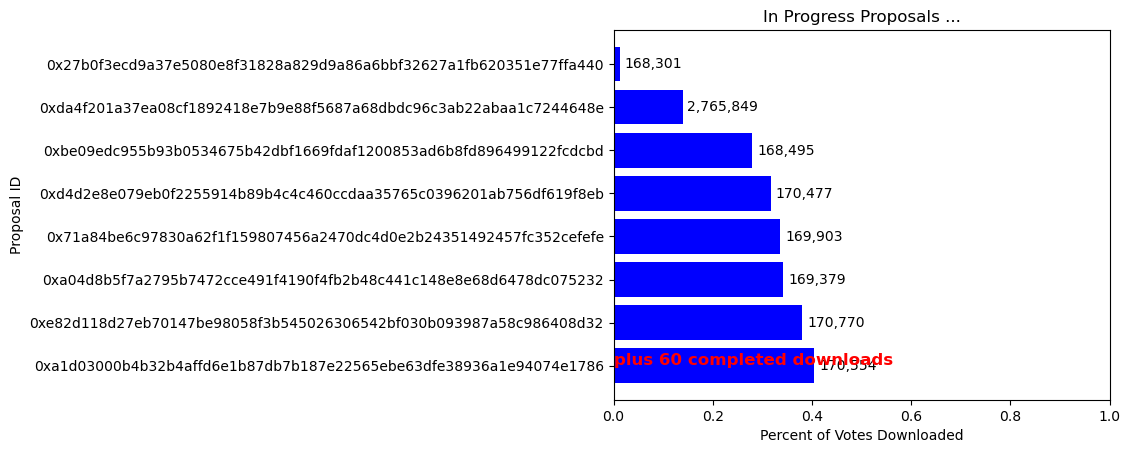

In [1220]:
# make a bar chart of percent_downloaded horizontally with a range of 0 to 1
import matplotlib.pyplot as plt
incomplete_proposals.sort_values("percent_downloaded", ascending=False, inplace=True)
plt.barh(incomplete_proposals.proposal_id, incomplete_proposals.percent_downloaded, color='b')
# sort by percent_downloaded
# label bars with total_votes
for i, v in enumerate(incomplete_proposals.total_votes):
    # make string with commas
    _ = label = str(f"{v:,}")
    # make the label line up with the bar
    _ = plt.text(incomplete_proposals.percent_downloaded.iloc[i] + 0.01, i, label, va='center')
plt.xlim(0, 1)

# color the bar green if total_votes equals downloaded_votes
for i, v in enumerate(incomplete_proposals.downloaded_votes):
    if v >= incomplete_proposals.total_votes.iloc[i]:
        plt.gca().get_children()[i].set_color('g')

plt.xlabel("Percent of Votes Downloaded")
plt.ylabel("Proposal ID")
plt.title("In Progress Proposals ...")
# add subtitle
plt.text(0, 0.01, f"plus {files_per_proposal.remainder.count()} completed downloads", fontsize=12, color='r', fontweight='bold')
# # make plot tall
# plt.gcf().set_size_inches(4, 36)
plt.show()

In [1221]:
# check on the big one
files_per_proposal.sort_values("total_votes", ascending=False).iloc[0]

proposal_id           0xda4f201a37ea08cf1892418e7b9e88f5687a68dbdc96...
file_count                                                          384
remainder                                                           NaN
total_votes                                                     2765849
downloaded_votes                                               384000.0
percent_downloaded                                             0.138836
Name: 59, dtype: object

In [1222]:
# total votes downloaded
files_per_proposal.downloaded_votes.sum()

17174743.0

In [1223]:
# total progress %
files_per_proposal.downloaded_votes.sum() / large_proposals_and_votes.vote.sum()

0.38120777575174186

In [1224]:
per_min_rate = files_per_proposal.downloaded_votes.sum() / 15
# this is the per min rate
per_min_rate

2146842.875

In [1225]:
# total votes to download, calculate from the large_proposals_and_votes
large_proposals_and_votes.vote.sum() / per_min_rate
# expected 231 mins to download

20.9859307938407